<a href="https://colab.research.google.com/github/Usharani-93/Python-Projects/blob/main/Analytics_flipkart_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import essential libraries**

pandas → for data manipulation and analysis

numpy → for numerical operations

matplotlib.pyplot → for creating visualizations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Load the Flipkart customer review dataset from Google** **Drive**

We start by importing the dataset, which contains product reviews from Flipkart.  
This includes columns like product name, rating, price, review text, and sentiment.  
The dataset is stored in Google Drive and loaded using pandas.


In [2]:
df = pd.read_csv("/content/drive/MyDrive/flipkart_reviews.csv")
print(df.head())

                                        Product_name Product_price Rate  \
0  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
1  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    5   
2  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   
3  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    1   
4  Candes 12 L Room/Personal Air Cooler??????(Whi...          3999    3   

            Review                                            Summary  \
0           super!  great cooler excellent air flow and for this p...   
1          awesome              best budget 2 fit cooler nice cooling   
2             fair  the quality is good but the power of air is de...   
3  useless product                  very bad product its a only a fan   
4             fair                                      ok ok product   

  Sentiment  
0  positive  
1  positive  
2  positive  
3  negative  
4   neutral  


In [3]:
print(df.columns.tolist())

['Product_name', 'Product_price', 'Rate', 'Review', 'Summary', 'Sentiment']


**Data Cleaning - Handling Missing Values**


Before analysis, we check for and handle missing data.  
- If a review is missing, we replace it with `"No Review"` so it doesn't affect text analysis.  
- If a summary is missing, we drop that row since it's incomplete feedback.


In [4]:
print(df.info())#info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205052 entries, 0 to 205051
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Product_name   205052 non-null  object
 1   Product_price  205052 non-null  object
 2   Rate           205052 non-null  object
 3   Review         180388 non-null  object
 4   Summary        205041 non-null  object
 5   Sentiment      205052 non-null  object
dtypes: object(6)
memory usage: 9.4+ MB
None


In [5]:
print(df.shape)#shape of the dataset

(205052, 6)


In [6]:
print("Missing values before cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
Product_name         0
Product_price        0
Rate                 0
Review           24664
Summary             11
Sentiment            0
dtype: int64


In [7]:
df['Review'] = df['Review'].fillna('No Review')
df.dropna(subset=['Summary'], inplace=True)

In [8]:
print("Missing values after cleaning:")
print(df.isnull().sum())

Missing values after cleaning:
Product_name     0
Product_price    0
Rate             0
Review           0
Summary          0
Sentiment        0
dtype: int64


In [9]:
print(df.shape)#after removing missing values

(205041, 6)


**Data Type** **Conversion**

Convert string columns to numeric for proper analysis

In [10]:
print(df.dtypes[['Product_price', 'Rate']])

Product_price    object
Rate             object
dtype: object


In [11]:
#Convert 'Product_price' to numeric (e.g., from '₹299' to 299
df['Product_price'] = pd.to_numeric(df['Product_price'], errors='coerce')

# Convert 'Rate' column (star rating) to numeric
df['Rate'] = pd.to_numeric(df['Rate'], errors='coerce')

# Drop rows where conversion failed (invalid or missing prices/ratings)
df.dropna(subset=['Product_price', 'Rate'], inplace=True)

**Remove Outliers in Product** **Price**

To avoid distortion in analysis due to extremely high-priced products,  
we remove the top 1% of prices (above the 99th percentile).  
This helps focus on the majority of realistically priced items in the dataset.


In [12]:
print("Before removing outliers:", df['Product_price'].describe())

Before removing outliers: count    205038.000000
mean       4135.341117
std        9882.166775
min          59.000000
25%         319.000000
50%         675.000000
75%        2999.000000
max       86990.000000
Name: Product_price, dtype: float64


In [13]:
df = df[df['Product_price'] < df['Product_price'].quantile(0.99)]

In [14]:
df = df[df['Product_price'] < df['Product_price'].quantile(0.99)]
print("After removing outliers:", df['Product_price'].describe())

After removing outliers: count    200763.000000
mean       2992.985719
std        5574.785677
min          59.000000
25%         299.000000
50%         649.000000
75%        2699.000000
max       30999.000000
Name: Product_price, dtype: float64


**Product Category** **Assignment**

Since the dataset doesn't have a predefined category column,  
we create one manually by checking for keywords in the product name.

In [15]:
def get_category(name):
    name = name.lower()
    if 'cooler' in name:
        return 'Coolers'
    elif 'phone' in name or 'mobile' in name:
        return 'Electronics'
    elif 'shirt' in name or 'dress' in name:
        return 'Clothing'
    elif 'furniture' in name or 'decor' in name:
        return 'Home'
    else:
        return 'Other'
# Create new column
df['Category'] = df['Product_name'].apply(get_category)

 **Sentiment Distribution**

In [16]:
print(df['Sentiment'].value_counts())

Sentiment
positive    162852
negative     27791
neutral      10120
Name: count, dtype: int64


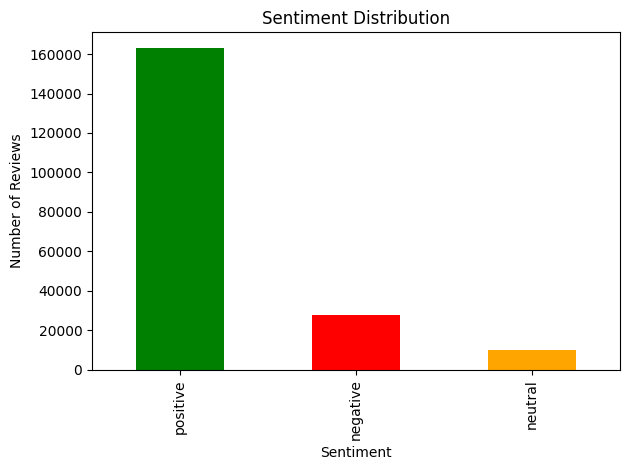

In [17]:
df['Sentiment'].value_counts().plot(kind='bar', color=['green','red','orange'])
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.tight_layout()
plt.show()
#This chart shows the overall distribution of customer sentiments
#based on the reviews in the dataset — classified as Positive, Neutral, or Negative.
#By visualizing this, we understand how satisfied Flipkart customers are in general.

**Sentiment-Wise Rating Comparison**

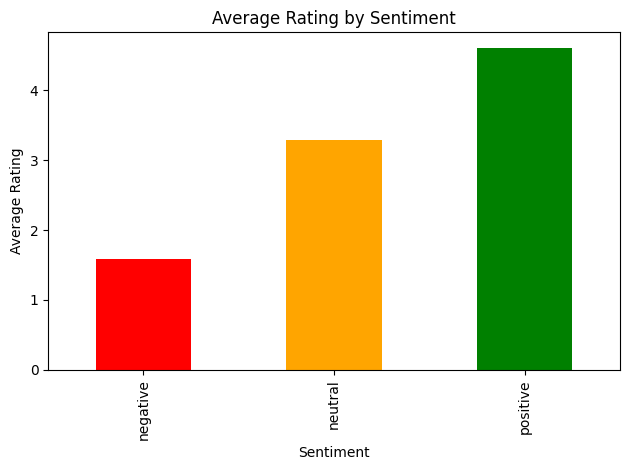

In [18]:
df.groupby('Sentiment')['Rate'].mean().plot(kind='bar', color=['Red','orange','green'])
plt.title("Average Rating by Sentiment")
plt.ylabel("Average Rating")
plt.xlabel("Sentiment")
plt.tight_layout()
plt.show()
# Visualizing how average numeric rating varies by sentiment

**Price Comparison by Sentiment**

pricing strategy from real customer behavior

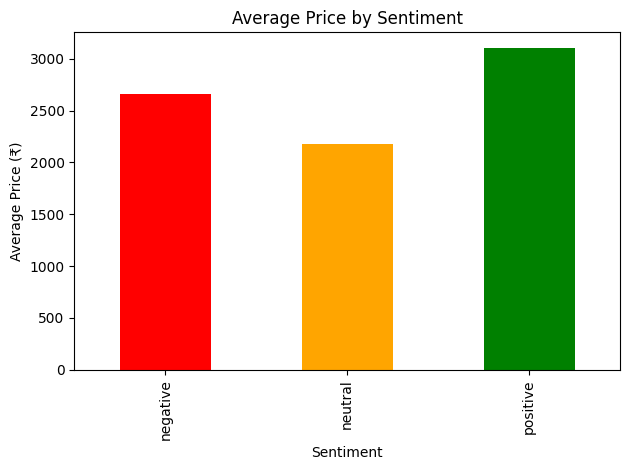

In [19]:
df.groupby('Sentiment')['Product_price'].mean().plot(kind='bar', color=['red', 'orange','green'])
plt.title('Average Price by Sentiment')
plt.ylabel('Average Price (₹)')
plt.xlabel('Sentiment')
plt.tight_layout()
plt.show()

**Relationship Between Product Price and Customer Rating**


to explore whether more expensive products get better ratings


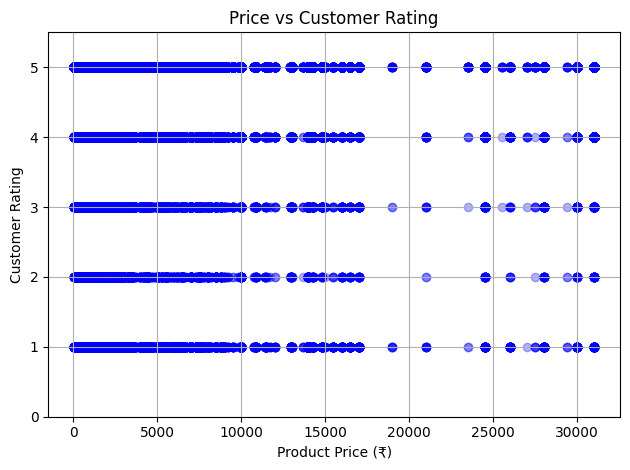

In [20]:
plt.scatter(df['Product_price'], df['Rate'], alpha=0.3, color='blue')
plt.title('Price vs Customer Rating')
plt.xlabel('Product Price (₹)')
plt.ylabel('Customer Rating')
plt.grid(True)
plt.ylim(0, 5.5)
plt.tight_layout()
plt.show()

**Top 10 Most Reviewed Products**

Identify and plot the 10 most reviewed products

/tmp/ipython-input-4013097.py:6: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4013097.py:6: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4013097.py:6: UserWarning: Glyph 146 (\x92) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4013097.py:6: UserWarning: Glyph 157 (\x9d) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-4013097.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 130 (\x82) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 147 (\x93) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(byt

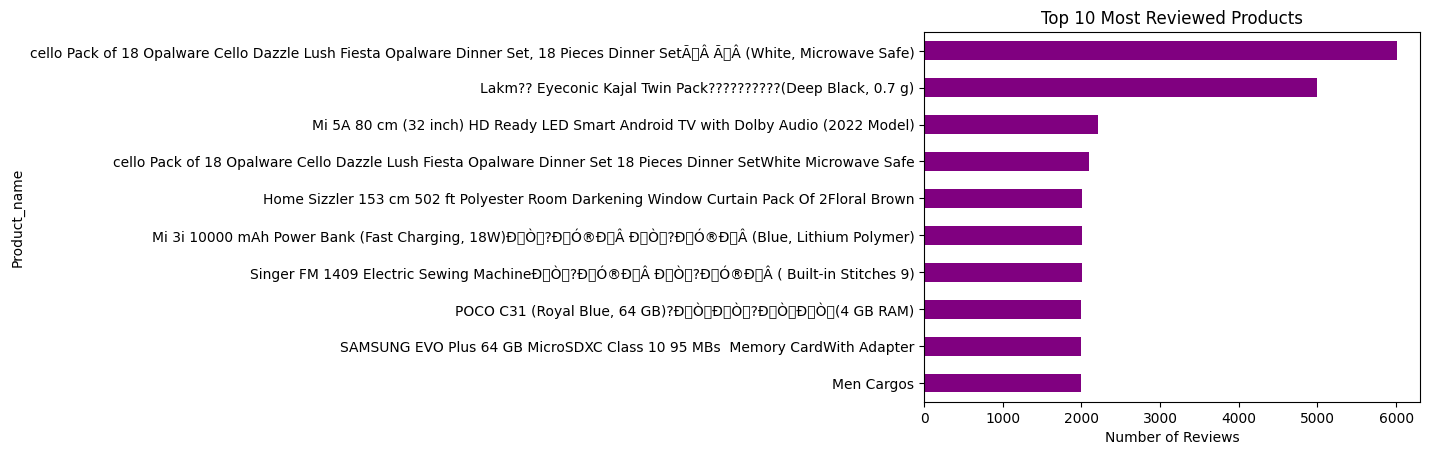

In [21]:
top_products = df['Product_name'].value_counts().head(10)
top_products.plot(kind='barh', color='purple') # Plot as a horizontal bar chart
plt.title("Top 10 Most Reviewed Products")
plt.xlabel("Number of Reviews")
plt.gca().invert_yaxis() # Highest bar on top
plt.tight_layout()
plt.show()

**Sentiment Trends Across Product Categories**

Visualize sentiment distribution across product categories

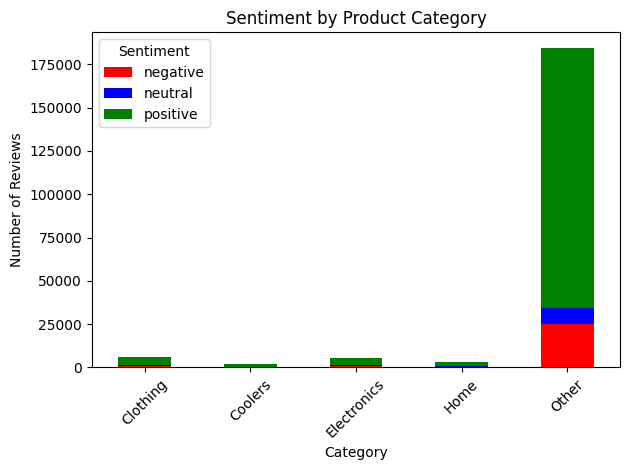

In [22]:
sentiment_by_category = pd.crosstab(df['Category'], df['Sentiment'])
sentiment_by_category.plot(kind='bar', stacked=True,
                           color={'positive': 'green', 'negative': 'red', 'neutral': 'blue'})
plt.title('Sentiment by Product Category')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()

**Forecast Insight – Positive Sentiment Ratio by Category**


Calculate the positive sentiment ratio for each category


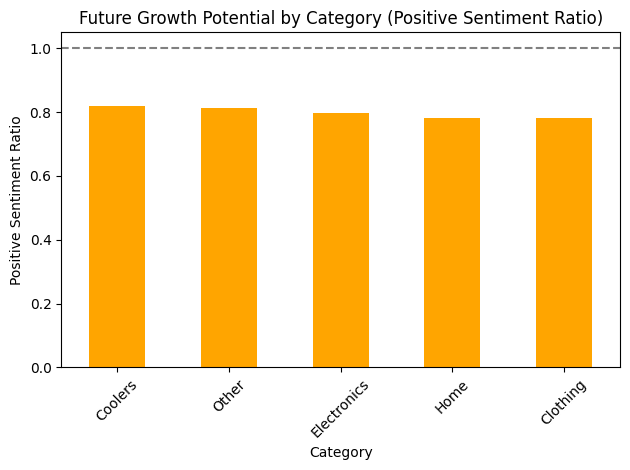

In [23]:
sentiment_by_category['positive_ratio'] = sentiment_by_category['positive'] / sentiment_by_category.sum(axis=1)
sentiment_by_category['positive_ratio'].sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Future Growth Potential by Category (Positive Sentiment Ratio)')
plt.ylabel('Positive Sentiment Ratio')
plt.xticks(rotation=45)
plt.axhline(y=1, color='grey', linestyle='--')
plt.tight_layout()
plt.show()

**Risk Products – High Price but Low Rating**


Identify products that are expensive but rated poorly

In [24]:
risky_products = df.groupby('Product_name').agg({'Rate':'mean', 'Product_price':'mean'})
risky_products = risky_products[(risky_products['Rate'] < 2.5) &
                                (risky_products['Product_price'] > df['Product_price'].mean())]
print("\nRisky Products (Expensive but Poorly Rated):")
print(risky_products.head())


Risky Products (Expensive but Poorly Rated):
                                                    Rate  Product_price
Product_name                                                           
HAVELLS convenio 500 W Food Processor??????????...  2.30         5499.0
PHILIPS HL1661/00 700 W Food Processor?????????...  2.40         7499.0
realme 4k Smart Google TV Stick (Black)????(Black)  2.25         3999.0


**Product Category Distribution**

Visualize how product reviews are distributed across categories

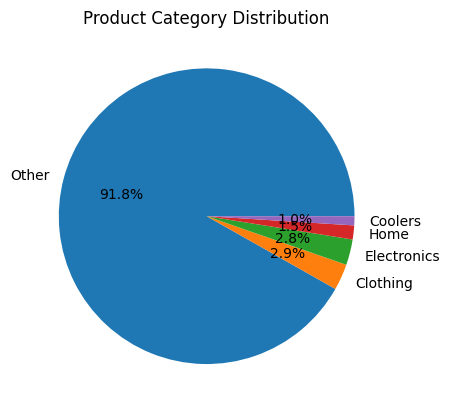

In [25]:
category_counts = df['Category'].value_counts()
category_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Product Category Distribution')
plt.ylabel('')
plt.show()


**Sentiment Ratio Table for Categories**

In [26]:
sentiment_percent = pd.crosstab(df['Category'], df['Sentiment'], normalize='index') * 100
print(sentiment_percent.round(1))

Sentiment    negative  neutral  positive
Category                                
Clothing         15.5      6.5      78.1
Coolers          14.3      3.8      81.9
Electronics      15.7      4.8      79.6
Home             15.8      6.0      78.2
Other            13.7      5.0      81.3


**Average Rating by Product Category**

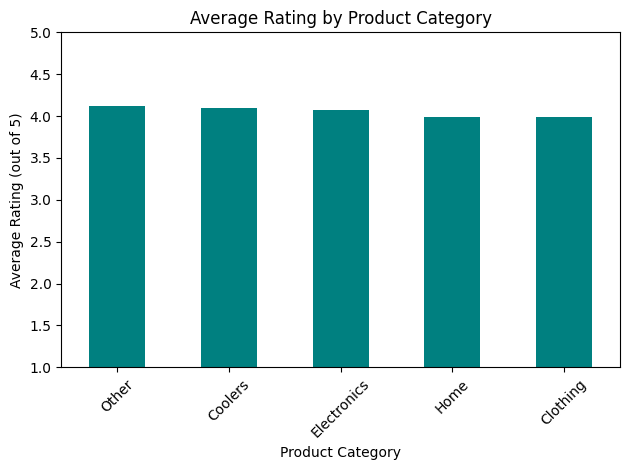

In [27]:
category_avg_rating = df.groupby('Category')['Rate'].mean().sort_values(ascending=False)

category_avg_rating.plot(kind='bar', color='teal')
plt.title("Average Rating by Product Category")
plt.xlabel("Product Category")
plt.ylabel("Average Rating (out of 5)")
plt.ylim(1, 5)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Top 10 Complaint Words in Negative Reviews**

Analyze most common complaint words from negative reviews

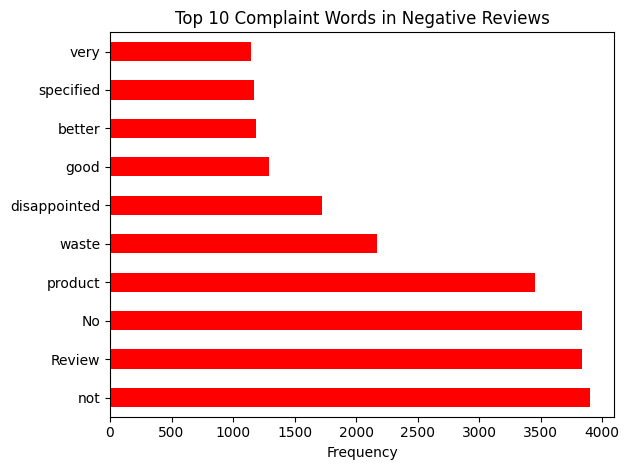

In [28]:
negative_reviews = df[df['Sentiment'] == 'negative']
common_complaints = negative_reviews['Review'].str.split(expand=True).stack().value_counts().head(10)

common_complaints.plot(kind='barh', color='red')
plt.title('Top 10 Complaint Words in Negative Reviews')
plt.xlabel('Frequency')

plt.tight_layout()
plt.savefig('flipkart_analysis.png', dpi=300)
plt.show()


**Negative Reviews by Category**


Visualizing number of negative reviews in each product category

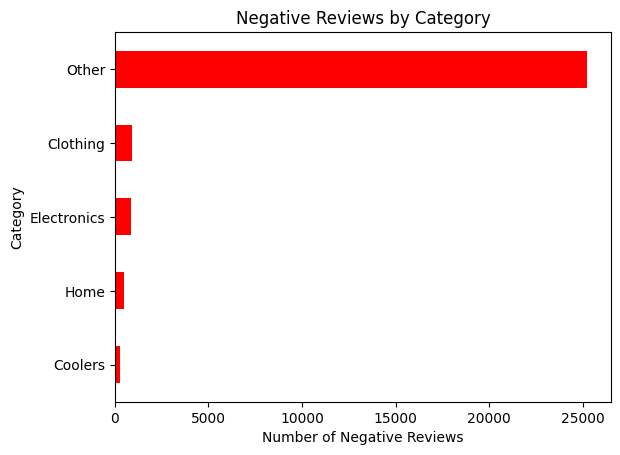

In [29]:
negative_by_category = sentiment_by_category['negative']
negative_by_category.sort_values().plot(kind='barh', color='red')
plt.title('Negative Reviews by Category')
plt.xlabel('Number of Negative Reviews')
plt.show()

**Top 5 Best-Performing Products**

 Find products with high ratings and many reviews

In [30]:
best_products = df.groupby('Product_name').agg({'Rate': 'mean', 'Review': 'count'})
best_products = best_products[best_products['Review'] > 20]  # only keep those with enough reviews
top5_best = best_products.sort_values(by='Rate', ascending=False).head(5)
print("Top 5 Best-Performing Products:")
print(top5_best)

Top 5 Best-Performing Products:
                                                        Rate  Review
Product_name                                                        
Lopezs Microfiber Floor MatGrey23mm Medium          4.952381      21
Suncrown Furniture Sheesham Wood Solid Wood 2 S...  4.896552      29
Men Checkered Single Breasted Formal Blazer????...  4.875000      24
The Answer Writing Manual For UPSC Civil Servic...  4.865000     200
WDIZE Magic Book For Kids ( 4 Book + 10 Refill ...  4.854701     117
